# 이미지 분류 AI 모델 만들기

이미지 분류 AI모델을 만들어서 0: 썩는 쓰레기 1: 썩지 않는 쓰레기를 분리해 볼것이다.

## 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

import numpy as np
import pandas as pd

In [2]:
labels = ['O', 'R']
img_size = 64
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # 원하는 크기로 이미지 크기 변경
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

## 데이터세트 불러오기

In [3]:
train = get_training_data('DATASET/TRAIN')
test = get_training_data('DATASET/TEST')

C:\Users\21\AppData\Local\Temp\ipykernel_3708\3925297170.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
print(train)

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],

         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],

         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],

         ...,

         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],

         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],

         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
         

## 데이터 시각화 및 전처리

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: ylabel='count'>

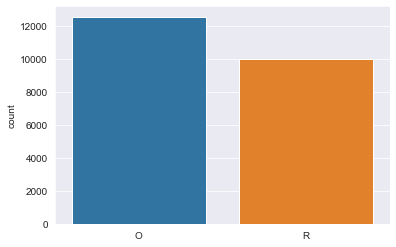

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("O")
    else:
        l.append("R")
        
sns.set_style('darkgrid')
sns.countplot(l)        

데이터의 균형이 맞지 않다. 학습 사례를 늘리기 위해 데이터 확대 기법을 사용할 것이다.

두 클래스 이미지 미리보기

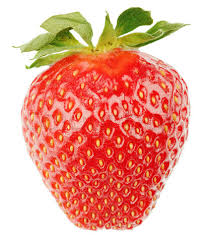

In [6]:
from PIL import Image
Image.open('DATASET/TRAIN/O/O_1.jpg')

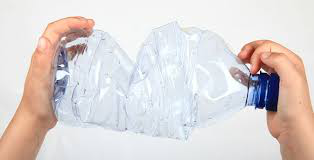

In [7]:
from PIL import Image
Image.open('DATASET/TRAIN/R/R_1.jpg')

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('DATASET/TRAIN',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('DATASET/TEST',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [10]:
# CNN 초기화
classifier = Sequential()

# 1단계 - 컨볼루션
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3),
                      activation = 'relu'))

# 2단계 - 풀링
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 두 번째 컨볼루션 레이어 추가
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3단계 - 평탄화
classifier.add(Flatten())


# 4단계 - 전체 연결
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# CNN 컴파일
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [12]:
history = classifier.fit(training_set,
                         steps_per_epoch = 706,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/15
706/706 [==============================] - 49s 69ms/step - loss: 0.3476 - accuracy: 0.8536
Epoch 2/15
706/706 [==============================] - 46s 65ms/step - loss: 0.3168 - accuracy: 0.8656
Epoch 3/15
706/706 [==============================] - 46s 65ms/step - loss: 0.2861 - accuracy: 0.8799
Epoch 4/15
706/706 [==============================] - 47s 67ms/step - loss: 0.2506 - accuracy: 0.8952
Epoch 5/15
706/706 [==============================] - 47s 66ms/step - loss: 0.2113 - accuracy: 0.9148
Epoch 6/15
706/706 [==============================] - 48s 68ms/step - loss: 0.1589 - accuracy: 0.9380
Epoch 7/15
706/706 [==============================] - 47s 66ms/step - loss: 0.1194 - accuracy: 0.9543
Epoch 8/15
706/706 [==============================] - 47s 67ms/step - loss: 0.0840 - accuracy: 0.9701
Epoch 9/15
706/706 [==============================] - 49s 70ms/step - loss: 0.0643 - accuracy: 0.9776
Epoch 10/15
706/706 [==============================] - 47s 66ms/step - loss: 0.048

In [13]:
img_size = 64
def get_sample_data(data_dir):
    data = []
    path = os.path.join(data_dir)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # 원하는 크기로 이미지 크기 변경
            data.append([resized_arr])
        except Exception as e:
            print(e)
    return np.array(data)

In [26]:
sample = get_sample_data('OR')

In [27]:
print(sample)

[[[[[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   ...

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]]]



 [[[[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255 255 255]
    ...
    [255 255 255]
    [255 255 255]
    [255 255 255]]

   [[255 255 255]
    [255 255 255]
    [255

In [28]:
x_sample = []

for feature in sample:
    x_sample.append(feature)

In [29]:
# 데이터 정규화
x_sample = np.array(sample) / 255

In [30]:
# 딥 러닝을 위한 데이터 크기 조정
x_sample= x_sample.reshape(-1, img_size, img_size, 3)

In [31]:
predicted = (classifier.predict(x_sample) > 0.5).astype("int32")
predictions = predicted.reshape(1,-1)[0]

predictions

4/4 [==============================] - 0s 8ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [32]:
final_score = 0 
for i in range(len(predictions)):
    if i < 50:
        if predictions[i] == 0:
            final_score += 1
    else:
        final_score +=1
print(final_score)

56


## Result

CPU의 성능이 좋지않아 원하는 만큼의 딥러닝을 수행할 수 없었고, 이미지 데이터 사이즈도 64로 축소하여 학습하여서 정확도가 높게 나온것에 비해 100개의 사진중 56개의 사진만 제대로 예측하였다. . . . . . . 
sequntial 모델의 layer를 추가하고 에포크를 늘리면 좀 더 정확한 예측을 할 수 있을 것 같다.